## Time-Series Analysis & Prediction Uber

### Part 1: Introduction

Time Series is a collection of data points collected at **constant time** intervals. 
<br>
These are analyzed to determine long-term trends and to predict the future or perform other forms of analysis.
<br>
<br>
Time Series is ** time dependent ** and along with an increasing or decreasing trend, some Time Series have some form of ** seasonality trends ** which we can analysis.

### Part 2: Moving Average

A [Moving Average](https://en.wikipedia.org/wiki/Moving_average) (rolling average or running average) is a calculation to analyze data points by creating series of averages of different subsets of the full data set.  

Given a series of numbers and a fixed subset size, the ** first element ** of the moving average is obtained by taking the average of the ** initial fixed subset ** of the number series. 

#### 1. Simple Moving Average

The simplest form of a moving average, appropriately known as a simple moving average (SMA), is calculated by taking the ** arithmetic mean ** of a given set of values. In other words, a set of numbers, are added together and then divided by the number in the set.


For exmaple, if you want to calculate 10 day moving average of the price, you should first add the price of the last 10 days and divide 10.
The resulting average below (11) takes into account the past 10 data points in order to give traders an idea of how an asset is priced relative to the past 10 days. 

![sma-exmaple](https://i.investopedia.com/inv/articles/site/Calculation1.gif)

The ** "Moving" ** average is different from regular mean that ** New Values ** become available.
The oldest data points must be dropped from the set and new data points must come in to replace them. Thus, the data set is constantly "moving" to account for new data as it becomes available. 

This method of calculation ensures that only the ** Current Information ** is being accounted for. 

In Figure below, once the new value of 5 is added to the set, the red box (representing the past 10 data points) moves to the right and the last value of 15 is dropped from the calculation. 

Because the relatively small value of 5 replaces the high value of 15, you would expect to see the average of the data set decrease, which it does, in this case from 11 to 10.

![sma-exmaple](https://i.investopedia.com/inv/articles/site/calculation2.gif)

To understand it more clear, we can plot two moving average lines of the close price below which have different time periods.

The red line is simply the average price over the past 50 days, while the blue line is the average price over the past 100 days

![sma-exmaple](https://i.investopedia.com/image/png/1519964018927/moving_averages_what_are_they_figure3.png)


#### 2. Exponential Moving Average

However, there is still a probelm, when we calcualte the simple moving average, we use each point in the data series as the same weighting, regardless of where it occurs in the sequence. 

But in real analysis, the most recent data is more significant than the older data and should have a greater influence on the final result. So, if we give higher importance to recent data, we can get a new kind of MA Model - ** Exponential Moving Average ** (EMA). 

here is the EMA equation:
![sma-exmaple](https://i.investopedia.com/inv/articles/site/CalculationEMA.gif)

you may notice that there is no value available to use as the previous EMA. This small problem can be solved by starting the calculation with a simple moving average and continuing on with the above formula from there.

#### 3. Weighted Moving Average

By looking at the calculation of the EMA, you will notice that more emphasis is placed on the recent data points, making it a type of ** Weighted Moving Average **.

The WMA is a weighted average of the last n prices, where the weighting decreases with each previous price. This is a similar concept to the EMA, but the calculation for the WMA is different.

**`(Price X weighting factor) + (Price previous period X weighting factor-1)...`**

If there are four prices you want a weighted moving average of, then the most recent weighting could be 4/10, the period before could have a weight of 3/10, the period prior to that could have a weighting of 2/10, and so on. 10 is a randomly picked number, and a weight of 4/10 means the most recent price will account for 40% of the value of the WMA. The price three periods ago only accounts of 10% of the WMA value.  

Assume prices of 90, 89, 88, 89, with the most recent price first:

((90 x (4/10)) + (89 x (3/10)) + (88 x (2/10)) + (89 x (1/10)) = 36 + 26.7 + 17.6 + 8.9 = 89.2


[Read more - Simple Moving Average](https://www.investopedia.com/university/movingaverage/movingaverages1.asp#ixzz5D2bBkCmk)

[Read more - Weighted Moving Averge](https://www.thebalance.com/simple-exponential-and-weighted-moving-averages-1031196)

### Part 3: Code

#### Importing Libraries

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

#### Reading Data Set

In [2]:
data = pd.read_csv("uber_lyft_March.csv")

#### Introduction to Data Set

In [3]:
data.head()

,date_time,uber_distance,uber_duration,uber_estimate,uber_high_estimate,uber_low_estimate,main_temp,weather,uber_price_per_second,lyft_distance,lyft_duration,lyft_max_estimate,lyft_min_estimate,lyft_estimate,lyft_price_per_second,average_duration
0,3/1/18 0:00,1.73,360,7.5,9,6,46.69,Rain,0.019380,1.76,414,3.40,3.40,3.40,0.008786,387.0
1,3/1/18 0:01,1.90,480,5.5,7,4,46.69,Rain,0.010816,1.79,537,3.53,3.53,3.53,0.006942,508.5
2,3/1/18 0:02,2.26,420,7.0,9,5,46.56,Rain,0.015436,2.20,487,3.85,3.85,3.85,0.008490,453.5
3,3/1/18 0:03,1.63,360,7.5,9,6,46.56,Rain,0.018029,1.70,472,3.46,3.46,3.46,0.008317,416.0
4,3/1/18 0:04,2.17,480,9.5,11,8,46.56,Rain,0.018393,2.21,553,3.47,3.47,3.47,0.006718,516.5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44434 entries, 0 to 44433
Data columns (total 16 columns):
date_time                44434 non-null object
uber_distance            44434 non-null float64
uber_duration            44434 non-null int64
uber_estimate            44434 non-null float64
uber_high_estimate       44434 non-null int64
uber_low_estimate        44434 non-null int64
main_temp                44434 non-null float64
weather                  44434 non-null object
uber_price_per_second    44434 non-null float64
lyft_distance            44434 non-null float64
lyft_duration            44434 non-null int64
lyft_max_estimate        44434 non-null float64
lyft_min_estimate        44434 non-null float64
lyft_estimate            44434 non-null float64
lyft_price_per_second    44434 non-null float64
average_duration         44434 non-null float64
dtypes: float64(10), int64(4), object(2)
memory usage: 5.4+ MB


#### Plot Uber Vs LyFt Price (Per Second)

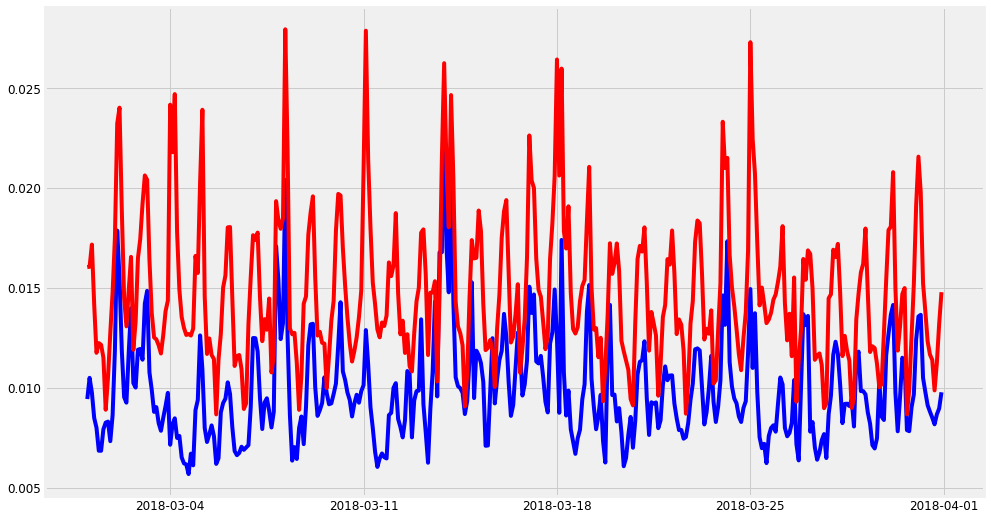

In [5]:
data = data.set_index(pd.DatetimeIndex(data['date_time']))
plt.rcParams['figure.figsize'] = (15, 9)
y_lyft=data['lyft_price_per_second'].resample('2H').mean()
y_uber=data['uber_price_per_second'].resample('2H').mean()
plt.plot(y_lyft, color='blue', label='Lyft') # Blue
plt.plot(y_uber, color='red', label='Uber') # Red

#### Stationary Series

A Time Series is said to be ** [Stationary](https://www.analyticsvidhya.com/blog/2015/12/complete-tutorial-time-series-modeling/) ** if its statistical properties such as mean, variance remain constant over time. 

Since most of the Time Series models work on the assumption that the TS is stationary. If a Time Series has a particular behaviour over time, there is a very high probability that it will follow the same in the future. 

Also, the theories related to stationary series are more mature and easier to implement as compared to non-stationary series.

For practical purposes we can assume the series to be stationary if it has constant statistical properties over time, Like the following:

**1. Constant Mean**

The mean of the series should not be a function of time rather should be a constant. 

The image below has the left hand graph satisfying the condition whereas the graph in red has a time dependent mean.

![sma-exmaple](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Mean_nonstationary.png)

**2. Constant Variance**

The variance of the series should not a be a function of time. This property is known as homoscedasticity. 

Following graph depicts what is and what is not a stationary series. (Notice the varying spread of distribution in the right hand graph)

![sma-exmaple](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Var_nonstationary.png)

**3. An autocovariance that does not depend on time.**

The covariance of the i th term and the (i + m) th term should not be a function of time. 

In the following graph, you will notice the spread becomes closer as the time increases. Hence, the covariance is not constant with time for the ‘red series’.

![sma-exmaple](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Cov_nonstationary.png)


In [6]:
# Function for checking whether the function is Stationary or not ()

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, x):
    
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation' + x)
    plt.show()
    
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

Let's Check our series is Stationary or not.

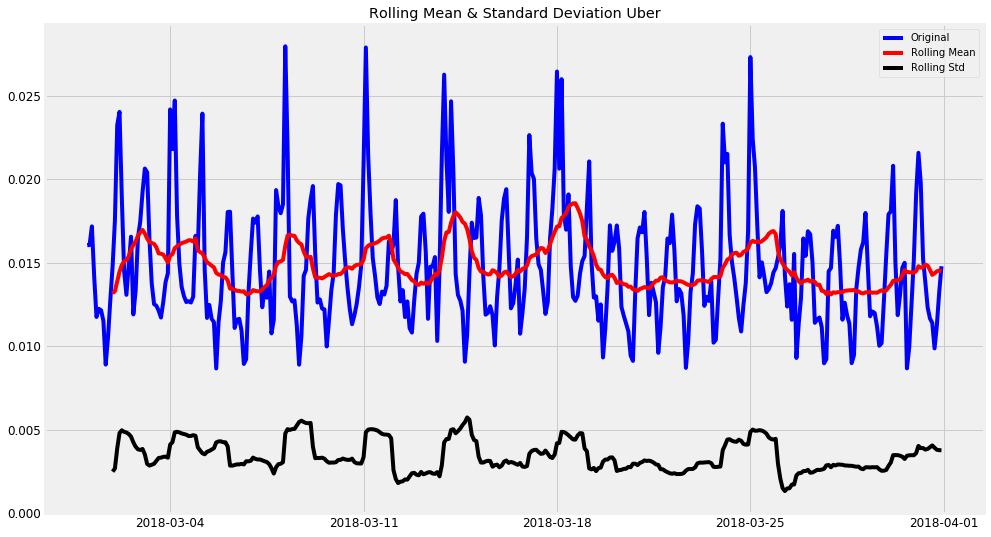

Results of Dickey-Fuller Test:
Test Statistic                  -4.938296
p-value                          0.000029
#Lags Used                      17.000000
Number of Observations Used    354.000000
Critical Value (1%)             -3.448958
Critical Value (5%)             -2.869739
Critical Value (10%)            -2.571138
dtype: float64


In [7]:
plt.rcParams['figure.figsize'] = (15, 9)
test_stationarity(y_uber, ' Uber')

For checking the stationarity we need to check p-Value

If p-value > 0.05: The Data is non-stationary.
<br>
p-value <= 0.05: The Data is stationary.

Also if Test Statics is Less than Critical Value (1 %) then the Series is Stationary.

As we can see from the test reaults p-value is less than 0.05. And also the critical valve is less than Test Statistic. Therefore our data is already Stationary. In case our Data weren't stationary, we need to remove Trend & Seasonality.

#### Forecasting a Time Series

Lets make model on the TS after differencing.

Having performed the trend and seasonality estimation techniques, there can be two situations:

**A strictly stationary series**
With no dependence among the values. This is the easy case wherein we can model the residuals as white noise. But this is very rare.

**A series with significant dependence among values.** 
In this case we need to use some statistical models like ARIMA to forecast the data.

**ARIMA** stands for Auto-Regressive Integrated Moving Averages. 

The ARIMA forecasting for a stationary time series is nothing but a linear (like a linear regression) equation. The predictors depend on the parameters (p,d,q) of the ARIMA model:

**Number of AR (Auto-Regressive) terms (p)**: 

AR terms are just lags of **dependent variable**. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).

**Number of MA (Moving Average) terms (q)**: 

MA terms are lagged **forecast errors** in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.

**Number of Differences (d)**: 

These are the number of **nonseasonal differences**, i.e. in this case we took the first order difference. So either we can pass that variable and put d=0 or pass the original variable and put d=1. Both will generate same results.

#### AR 1 Model

In [8]:
# AR 1 Model
series = y_uber
X = series.values

# split dataset
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]

# train autoregression
mod = ARIMA(train, order=(1, 0, 0))
model_fit = mod.fit()
print(model_fit.summary())
print('Coefficients: %s' % model_fit.params)

# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = mean_squared_error(test, predictions)
print('Test MSE: %.10f' % error)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  245
Model:                     ARMA(1, 0)   Log Likelihood                1102.302
Method:                       css-mle   S.D. of innovations              0.003
Date:                Thu, 06 Dec 2018   AIC                          -2198.604
Time:                        14:27:32   BIC                          -2188.100
Sample:                             0   HQIC                         -2194.374
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0151      0.001     26.893      0.000       0.014       0.016
ar.L1.y        0.6967      0.046     15.299      0.000       0.607       0.786
                                    Roots           

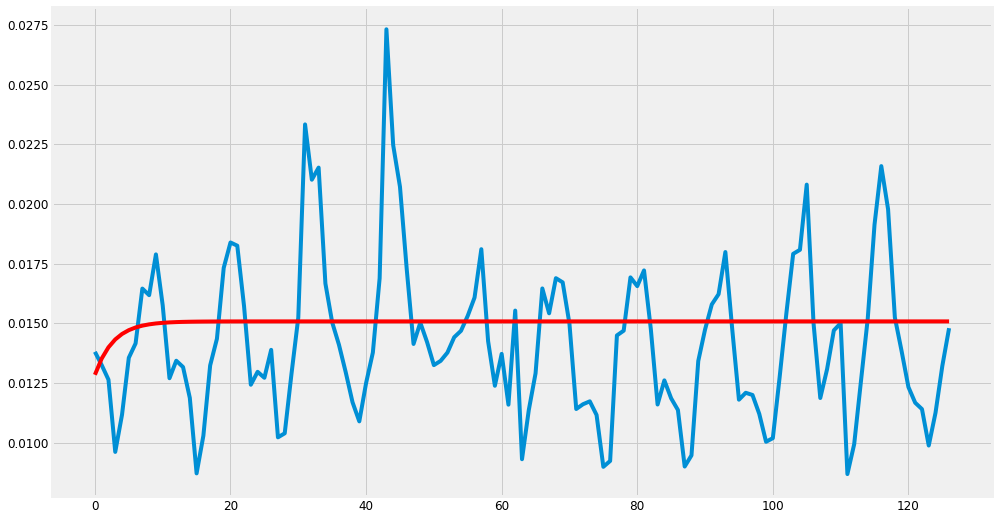

In [9]:
pyplot.plot(test)
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
pyplot.plot(predictions, color='red')
pyplot.show()

#### AR 5 Model

In [10]:
# AR 5 Model
series = y_uber
X = series.values
# split dataset
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
# train autoregression
mod = ARIMA(train, order=(5, 0, 0))
model_fit = mod.fit(disp=0)
print(model_fit.summary())
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = mean_squared_error(test, predictions)
print('Test MSE: %.10f' % error)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  245
Model:                     ARMA(5, 0)   Log Likelihood                1126.743
Method:                       css-mle   S.D. of innovations              0.002
Date:                Thu, 06 Dec 2018   AIC                          -2239.486
Time:                        14:27:34   BIC                          -2214.977
Sample:                             0   HQIC                         -2229.616
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0151      0.000     60.828      0.000       0.015       0.016
ar.L1.y        0.8010      0.061     13.075      0.000       0.681       0.921
ar.L2.y       -0.2150      0.080     -2.697      0.0

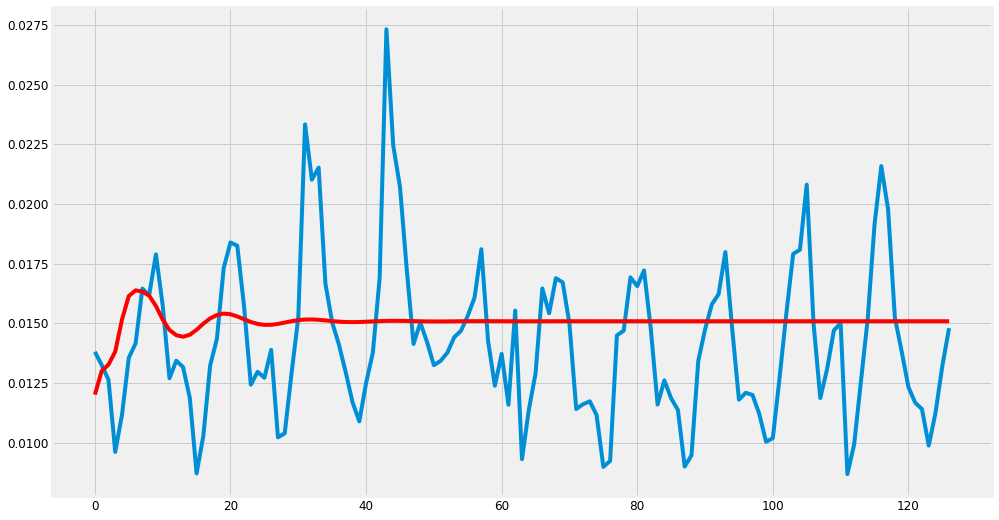

In [11]:
pyplot.plot(test)
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
pyplot.plot(predictions, color='red')
pyplot.show()

#### MA 1 Model

In [12]:
# MA 1 Model
series = y_uber
X = series.values
# split dataset
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
# train autoregression
mod = ARIMA(train, order=(0, 0, 1))
model_fit = mod.fit()
print(model_fit.summary())
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = mean_squared_error(test, predictions)
print('Test MSE: %.10f' % error)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  245
Model:                     ARMA(0, 1)   Log Likelihood                1089.730
Method:                       css-mle   S.D. of innovations              0.003
Date:                Thu, 06 Dec 2018   AIC                          -2173.460
Time:                        14:27:34   BIC                          -2162.956
Sample:                             0   HQIC                         -2169.230
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0151      0.000     50.256      0.000       0.015       0.016
ma.L1.y        0.6647      0.040     16.762      0.000       0.587       0.742
                                    Roots           

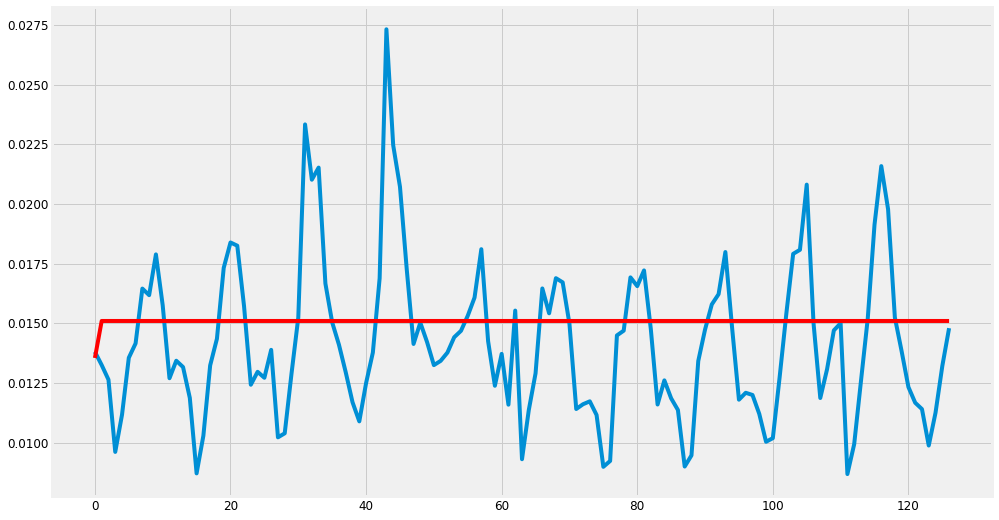

In [13]:
pyplot.plot(test)
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
pyplot.plot(predictions, color='red')
pyplot.show()

#### MA 5 Model

In [14]:
# MA 5 Model
series = y_uber
X = series.values
# split dataset
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
# train autoregression
mod = ARIMA(train, order=(0, 0, 5))
model_fit = mod.fit()
print(model_fit.summary())
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = mean_squared_error(test, predictions)
print('Test MSE: %.10f' % error)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  245
Model:                     ARMA(0, 5)   Log Likelihood                1115.829
Method:                       css-mle   S.D. of innovations              0.003
Date:                Thu, 06 Dec 2018   AIC                          -2217.658
Time:                        14:27:36   BIC                          -2193.149
Sample:                             0   HQIC                         -2207.788
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0151      0.001     28.117      0.000       0.014       0.016
ma.L1.y        0.8698      0.062     13.974      0.000       0.748       0.992
ma.L2.y        0.5807      0.080      7.295      0.0

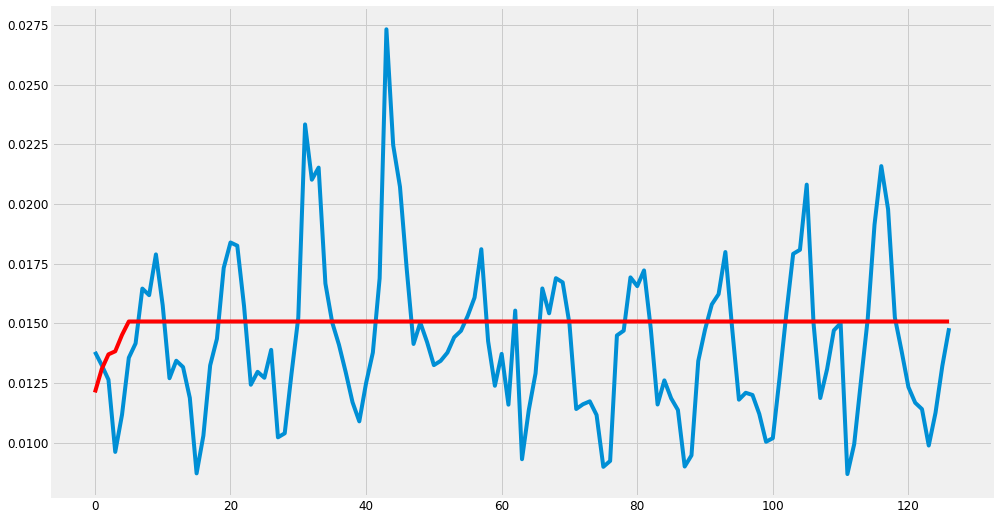

In [15]:
pyplot.plot(test)
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
pyplot.plot(predictions, color='red')
pyplot.show()

#### Combined  Model (AR = 1, MA = 1)

In [16]:
# Combine Model (AR = 1, MA = 1)
series = y_uber
X = series.values
# split dataset
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
# train autoregression
mod = ARIMA(train, order=(1, 0, 1))
model_fit = mod.fit()
print(model_fit.summary())
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = mean_squared_error(test, predictions)
print('Test MSE: %.10f' % error)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  245
Model:                     ARMA(1, 1)   Log Likelihood                1110.035
Method:                       css-mle   S.D. of innovations              0.003
Date:                Thu, 06 Dec 2018   AIC                          -2212.071
Time:                        14:27:36   BIC                          -2198.066
Sample:                             0   HQIC                         -2206.431
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0151      0.000     31.161      0.000       0.014       0.016
ar.L1.y        0.5517      0.069      7.977      0.000       0.416       0.687
ma.L1.y        0.3126      0.075      4.170      0.0

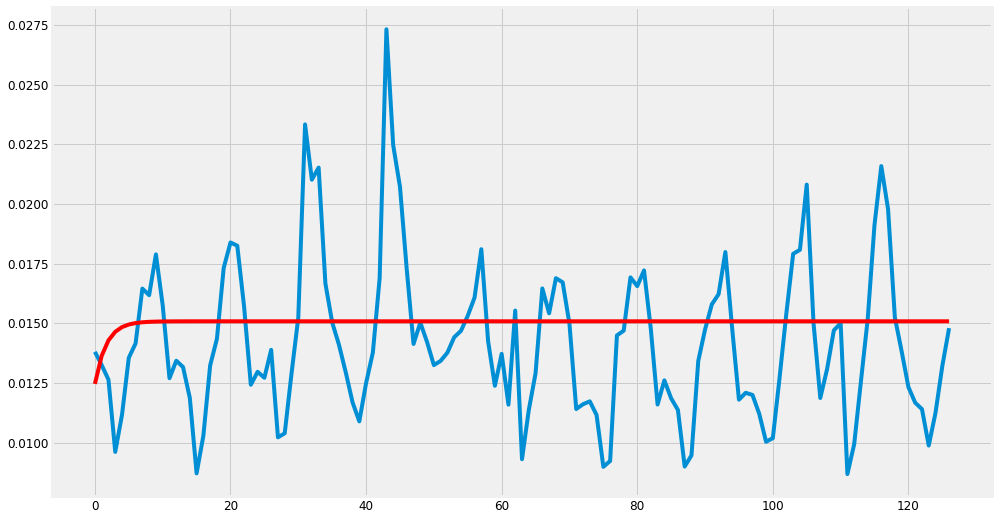

In [17]:
pyplot.plot(test)
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
pyplot.plot(predictions, color='red')
pyplot.show()

#### Combined  Model (AR = 2, MA = 2)

In [18]:
# Combain Model (AR = 2, MA = 2)
series = y_uber
X = series.values
# split dataset
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
# train autoregression
mod = ARIMA(train, order=(2, 0, 2))
model_fit = mod.fit()
print(model_fit.summary())
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = mean_squared_error(test, predictions)
print('Test MSE: %.10f' % error)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  245
Model:                     ARMA(2, 2)   Log Likelihood                1119.496
Method:                       css-mle   S.D. of innovations              0.003
Date:                Thu, 06 Dec 2018   AIC                          -2226.992
Time:                        14:27:38   BIC                          -2205.984
Sample:                             0   HQIC                         -2218.532
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0151      0.000     60.824      0.000       0.015       0.016
ar.L1.y        1.4891      0.079     18.839      0.000       1.334       1.644
ar.L2.y       -0.6990      0.077     -9.052      0.0

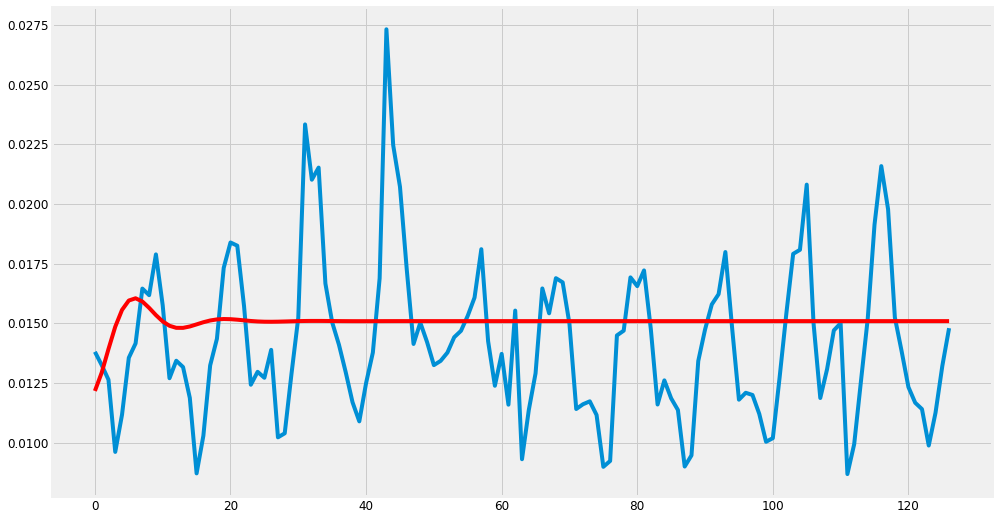

In [19]:
pyplot.plot(test)
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
pyplot.plot(predictions, color='red')
pyplot.show()

#### State-Space Models
[State-space models](https://www.mathworks.com/help/ident/ug/what-are-state-space-models.html#brbu1g0) are models that use state variables to describe a system by a set of first-order differential or difference equations, rather than by one or more nth-order differential or difference equations. State variables x(t) can be reconstructed from the measured input-output data, but are not themselves measured during an experiment.

The state-space model structure is a good choice for quick estimation because it requires you to specify only one input, the model order, n. The model order is an integer equal to the dimension of x(t) and relates to, but is not necessarily equal to, the number of delayed inputs and outputs used in the corresponding linear difference equation.

To Determine the Seasonal Parameters, we created the matrix with all the combinations of p, d, q, and we are feeding it to a Seasonal Model and printing an output. The Parameter with the least AIC will give us the best output.   

In [20]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [21]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y_uber,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:-2050.158983551676
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:-2347.838350569894
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:-3185.7146991583722
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:-3210.354286783647
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:-3195.4495513004463
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:-3373.8166689356344


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:-3150.24449904349
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:-3181.2954432315873
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:-2477.811339863415


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:-2675.3591338726487


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:-3283.8675835674194
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:-3286.550932676876
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:-3245.4546689083163
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:-3415.465299172151
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:-3239.8951715707108
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:-3261.1704424979434
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:-3298.2708220380036
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:-3271.884124198803
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:-3234.0240827668345
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:-3235.354624837544
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:-3326.1259066665825


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:-3343.909345582271


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:-3179.527992688835


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:-3225.3043121192395
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:-3289.6708200839016


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:-3248.1246865005096


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:-3272.7415290197005
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:-3278.0280788863965
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:-3312.515834879387


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:-3318.0906633707073


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:-3241.031170843159


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:-3268.5550017218748
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:-3309.4145144112927
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:-3278.456089157228
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:-3324.5223390828464


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:-3328.138062620712
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:-3246.5339560654425


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:-3499.025055104831


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:-3265.3339241305803
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:-3300.8767691391213
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:-3301.3553241879004
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:-3265.5192112582126


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:-3321.393358504523
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:-3316.6086045115053
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:-3224.379269711101
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:-3329.2869063624394
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:-3265.7004036994535


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:-3291.701925163737
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:-3298.9762954208936
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:-3258.550301005103


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:-3257.0830918154406
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:-3257.7141966915387
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:-3307.3009324638792
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:-3327.4807171851044


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:-3194.6366275788523
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:-3232.520592929036
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:-3286.7107017075728
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:-3258.069246271567


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:-3291.5701823759878


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:-3298.922086685389
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:-3332.0332016486245


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:-3462.739890054746
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:-3241.9389308356876
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:-3288.376758841732


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [26]:
series = y_uber
X = series.values
# split dataset
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
# train autoregression
mod = sm.tsa.statespace.SARIMAX(train,
                                order=(1, 0, 0),
                                seasonal_order=(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
model_fit = mod.fit()
print(results.summary())
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = mean_squared_error(test, predictions)
print('Test MSE: %.10f' % error)

                                 Statespace Model Results                                 
Dep. Variable:              uber_price_per_second   No. Observations:                  372
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                1649.188
Date:                            Thu, 06 Dec 2018   AIC                          -3288.377
Time:                                    14:30:45   BIC                          -3269.159
Sample:                                03-01-2018   HQIC                         -3280.723
                                     - 03-31-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5661      0.047     12.073      0.000       0.474       0.658
ma.L1         -0.9614      0.026   

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


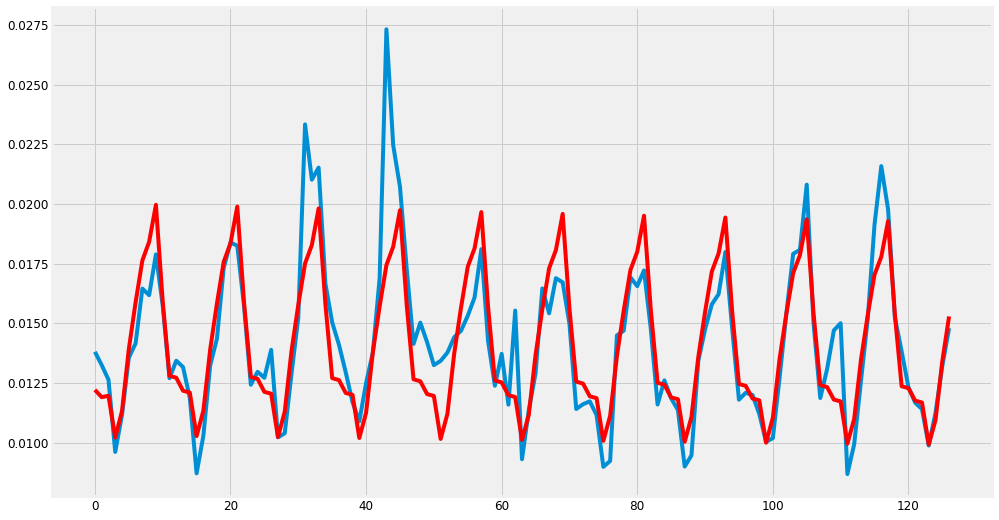

In [27]:
pyplot.plot(test)
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
pyplot.plot(predictions, color='red')
pyplot.show()

#### Conclusion:

The best output we are getting using Time Series for LyFt is using the Combined Model (AR = 2, MA = 2). The test MSE (Mean Square Error) we are getting for the Uber Price Prediction is 0.0000023243. 